# LINEAR AND LOGISTIC REGRESSION FOR BLACK FRIDAY DATASET

## ABSTRACT

* The aim of this assignment is to perform Linear and Logistic Regression for a chosen dataset and to build three models for the same

* For building any model, the first needs to be Data Preprocessing which consists of some common steps like importing the libraries, dataset, cleaning the data of any missing values, performing some Exploratory Data Analysis on the data to examine the estimators, etc. which is dealt with in the following steps.

* After data preprocessing is done, we can go ahead with building our models. In statistics, Linear Regression is a linear approach to model a relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variables). If only one explanatory variable exists it is called Linear Regression. In case of multiple explanatory variables it is called Multiple Linear Regression.

* Linear Regression is performed on continuous values, therefore all the categorical variables need to be converted to numerical ones. This is dealt later in the assignment.

* In statistics, a logistic model uses a logistic function to model a binary dependent variable. It is a form of logistic regression. 

## DATA PREPROCESSING

* Importing the Libraries  

* Importing the dataset 

* Getting rid of the missing values

* Performing Exploratory Data Analysis

* Dealing with Categorical Data (encoding text to number)

* Dealing with Dummy Variable Trap

* Splitting the data into Training set and Testing Set

* Feature Scaling

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn import metrics
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import statistics as st

In [12]:
df=pd.read_csv("black friday.csv", decimal = ',')

In [13]:
dflog = df

## EXPLORATORY DATA ANALYSIS (EDA)

In [14]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [15]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [16]:
df.shape

(550068, 12)

In [17]:
df = df.drop_duplicates(keep = 'first')
print(df.shape)

(550068, 12)


## The distribution of the target variable

Text(0.5, 1.0, 'Purchase amount Distribution')

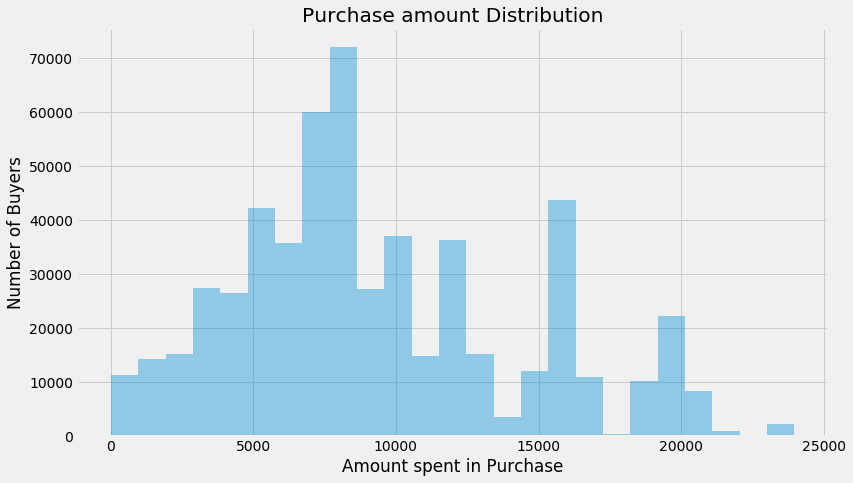

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(df.Purchase, bins = 25, kde = False)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

#### We can say that the distribution of purchase sort of resembles the Gaussian Distribution.

## Count of each variable

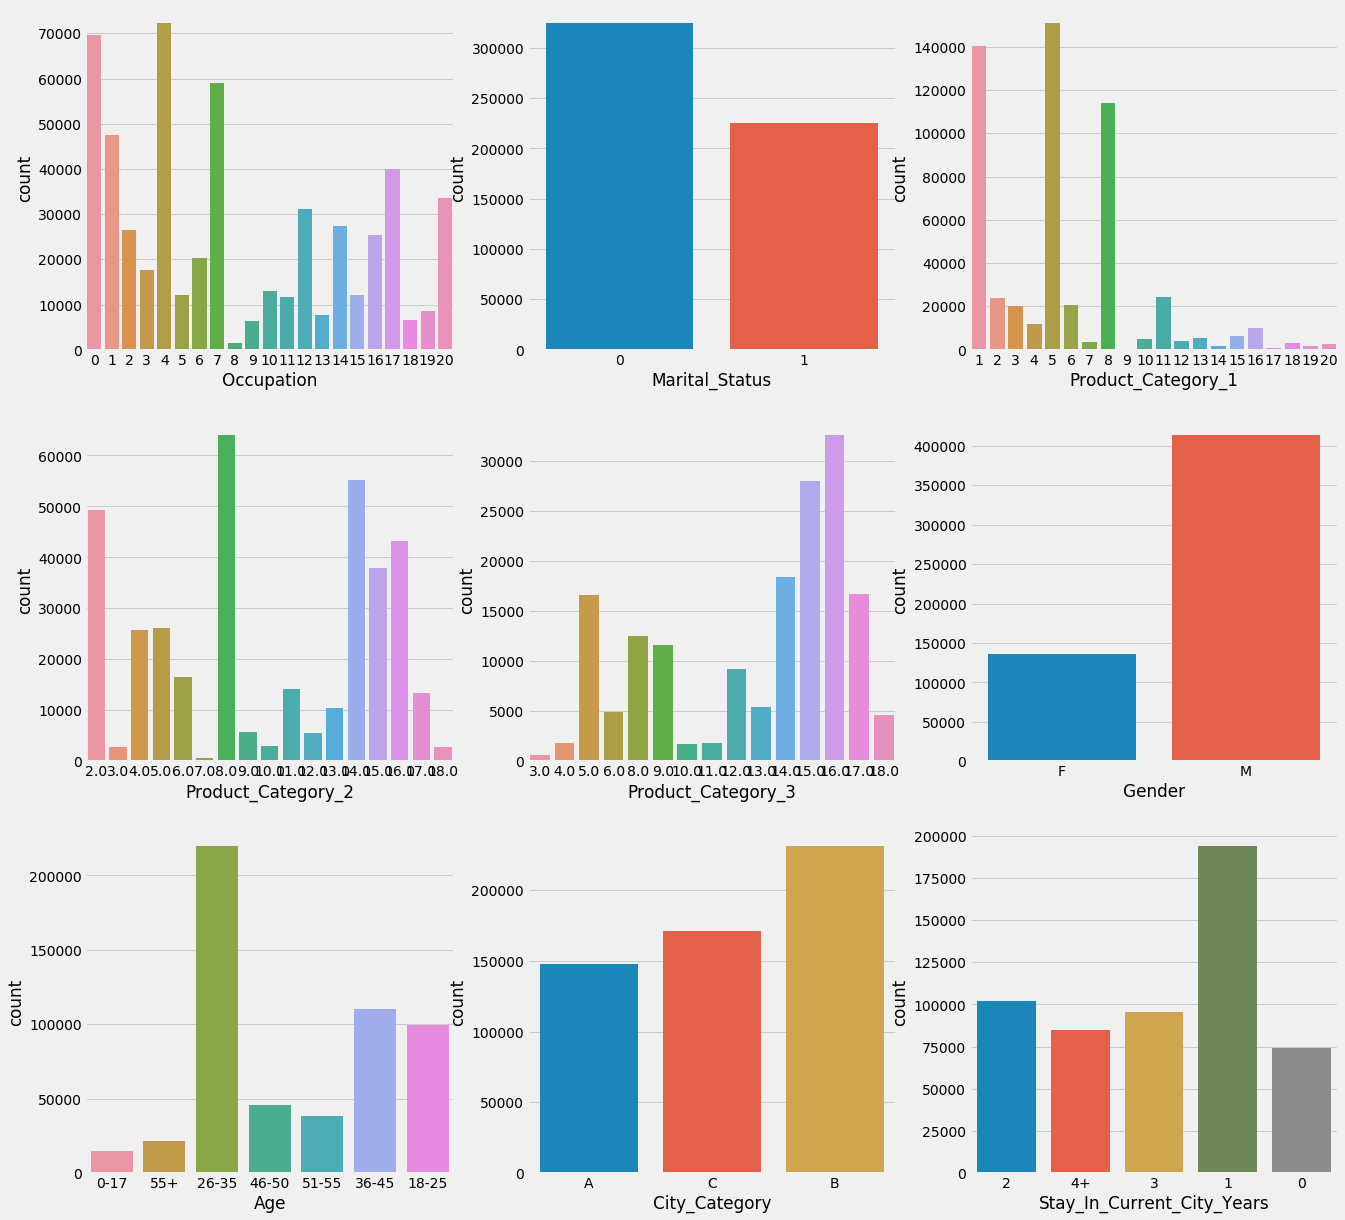

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))

def plotCountPlot(Name, num1, num2):
    sns.countplot(df[Name],ax=ax[num1][num2])
plotCountPlot('Occupation',0,0)
plotCountPlot('Marital_Status',0,1)
plotCountPlot('Product_Category_1',0,2)
plotCountPlot('Product_Category_2',1,0)
plotCountPlot('Product_Category_3',1,1)
plotCountPlot('Gender',1,2)
plotCountPlot('Age',2,0)
plotCountPlot('City_Category',2,1)
plotCountPlot('Stay_In_Current_City_Years',2,2)
##sns.countplot(df['Marital_Status'], ax=ax[0][1])
#sns.countplot(df['Product_Category_1'], ax=ax[0][2])
#sns.countplot(df['Product_Category_2'], ax=ax[1][0])
#sns.countplot(df['Product_Category_3'], ax=ax[1][1])
#sns.countplot(df['Gender'], ax = ax[1][2])
#sns.countplot(df['Age'], ax = ax[2][0])
#sns.countplot(df['City_Category'], ax = ax[2][1])
#sns.countplot(df['Stay_In_Current_City_Years'], ax = ax[2][2])

In [20]:
x = df[['Purchase','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]

ValueError: color kwarg must have one color per data set. 550068 data sets and 1 colors were provided

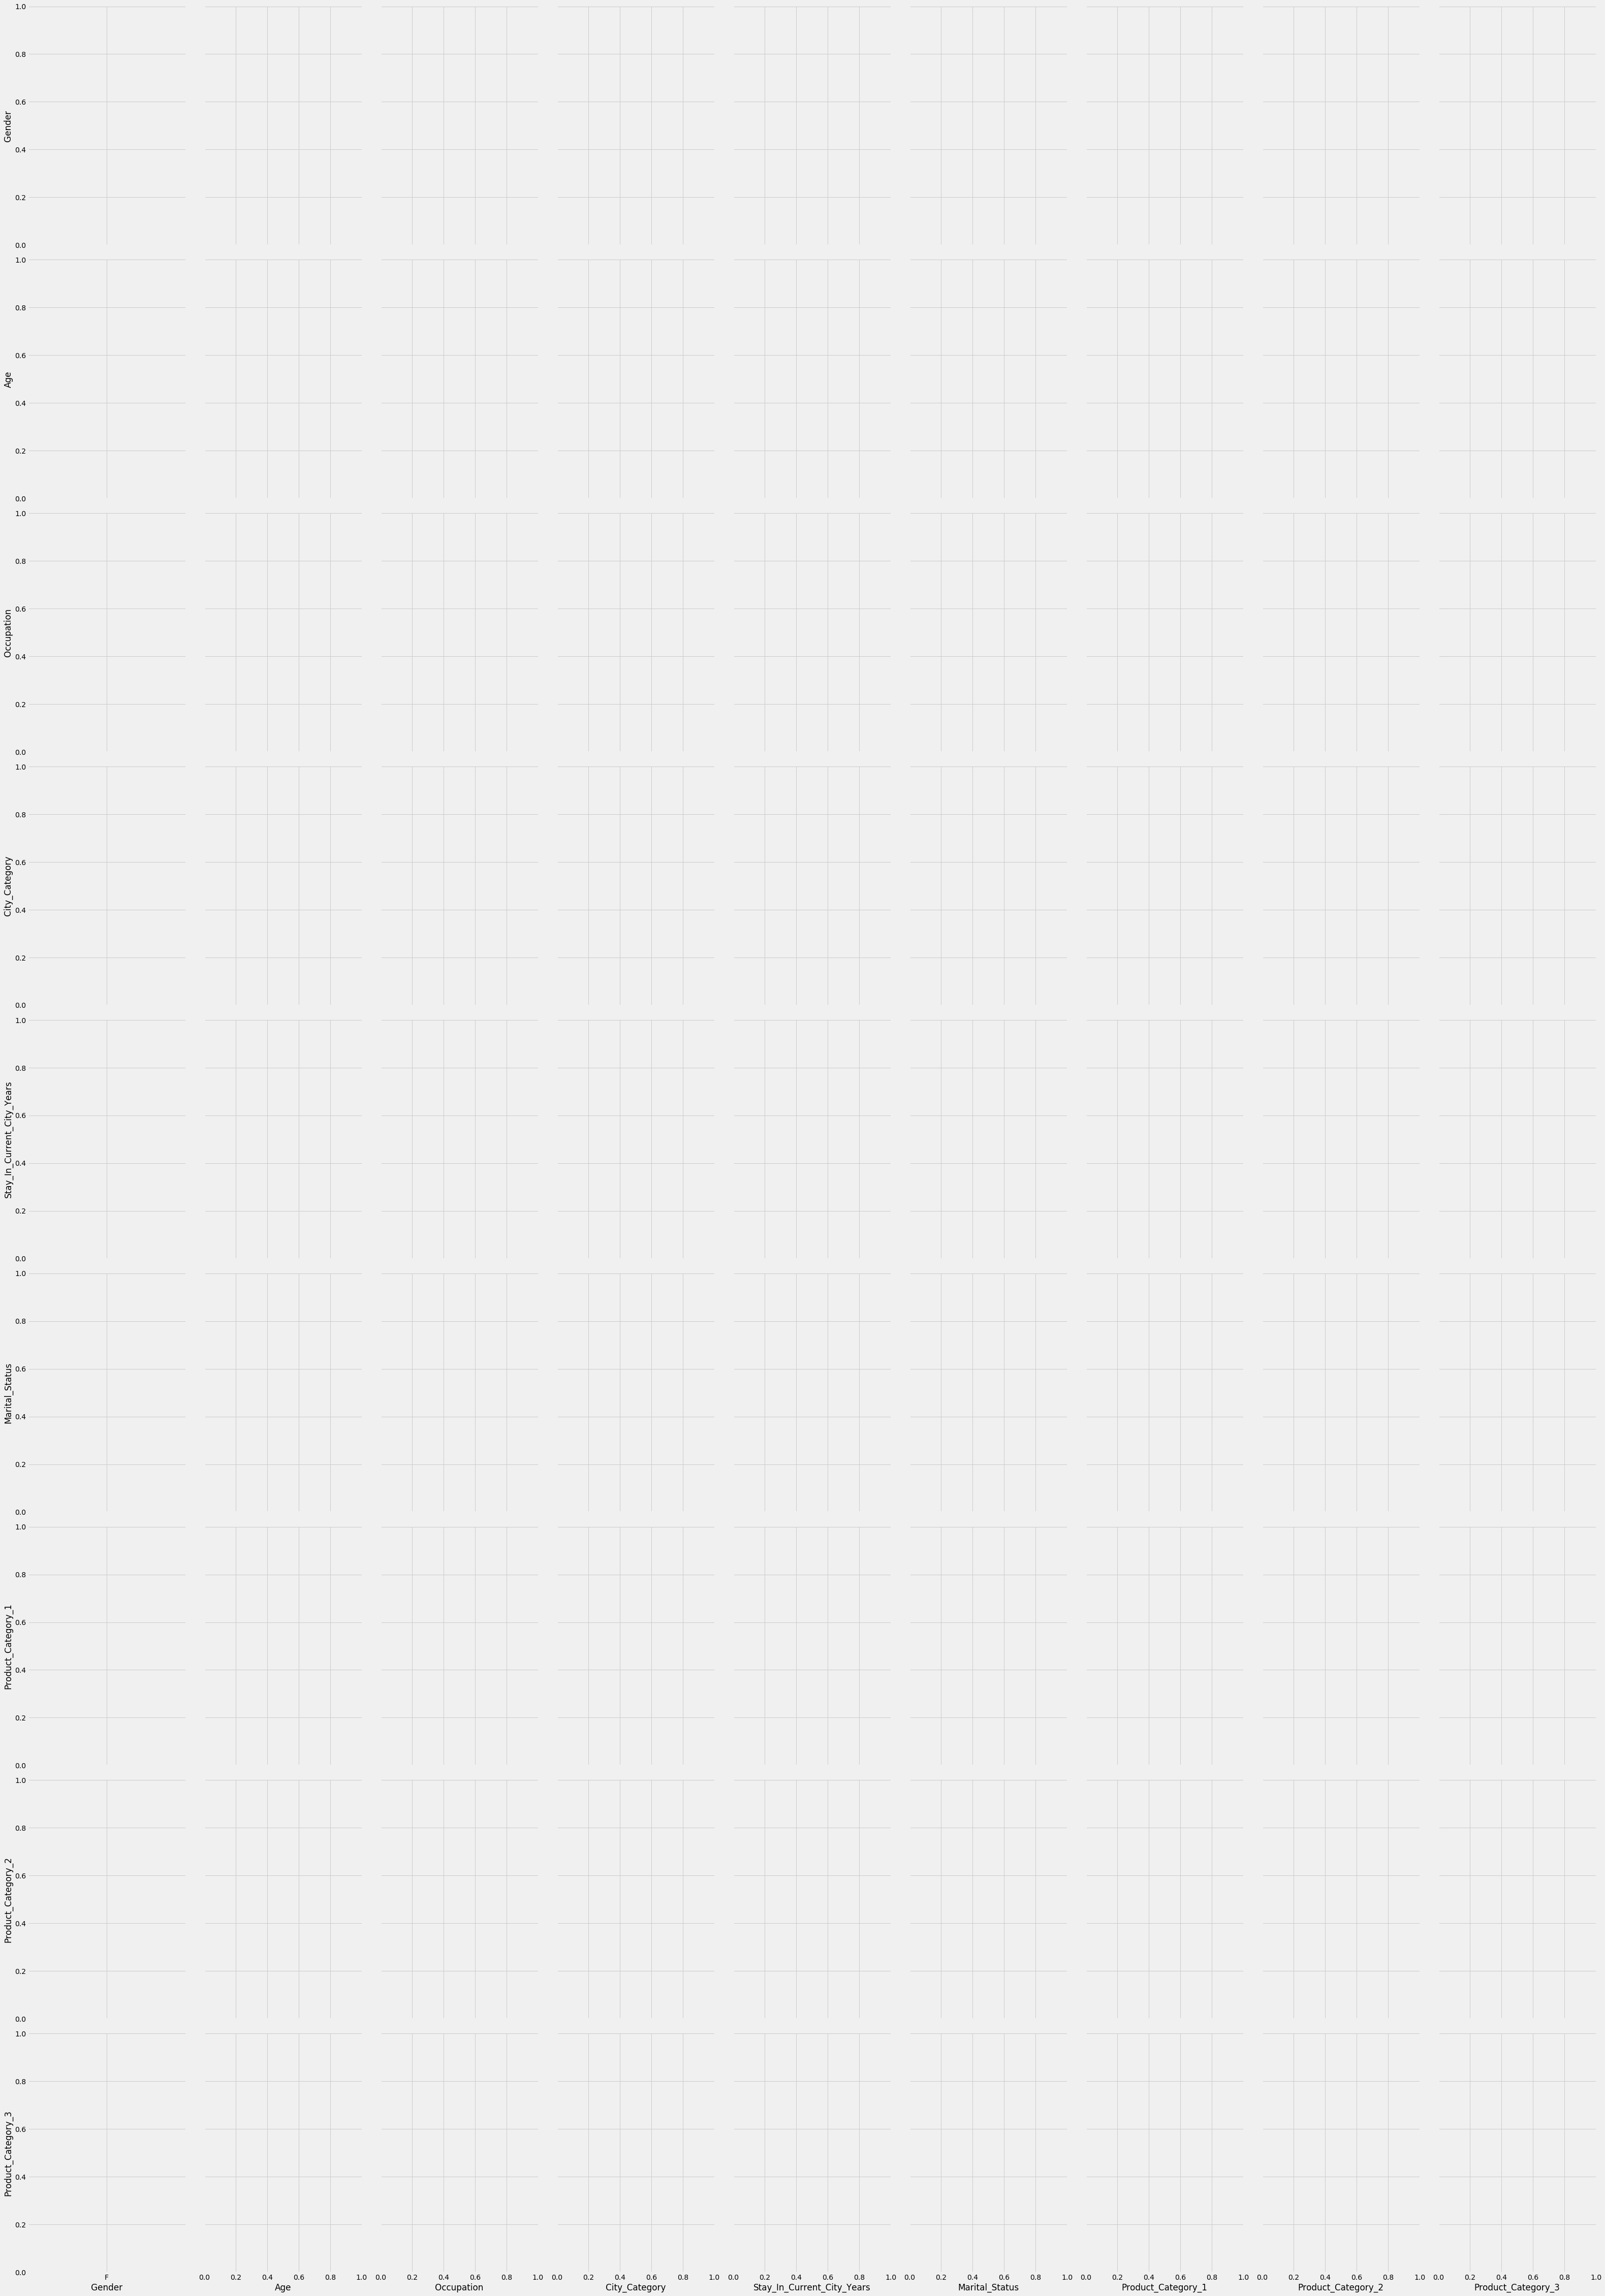

In [21]:
sns.pairplot(x,vars=['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3'], height=7, aspect=0.7, kind='reg')

## CORRELATION MATRIX

In [ ]:
correlation = df.corr()
correlation

In [ ]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlation, vmax=.8,annot_kws={'size': 20}, annot=True);

The Occupation variable seems to have the highest correlation with the Purchase. Product Category 1 seems to have the highest negative correlation with Purchase which is odd.

## PURCHASE AND OCCUPATION ANALYSIS

Since occupation has the highest correlation with Purchase, let's plot the relationship between the two.

In [ ]:
Occupation_pivot = \
df.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Occupation', y='Purchase', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='City_Category', y='Purchase', data=df, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

After plotting the bar plots, we can infer that the Dependent Variable Purchase doesn't really show any substantial change with respect to the Occupation estimator.

In [ ]:
df.isnull().sum()[df.isnull().sum() != 0]

Checking for null values. We can say that two of the rows from the dataset have null values of which we need to get rid of.

We can further say that, out of the 500000+ rows present in the data, the Product_Category_3 column consists of 75% of NaN values.

## SAMPLING THE DATA FOR MODELING

The dataset is too huge therefore I have sampled the dataset and using 40000 values to perform the further analysis. Sampling randomly selects any 40000 values in any order without repeating them from the dataset .

The User_ID and Product_ID colums are dropped because the value coming from these columns doesn't affect the purchase attribute.

In [ ]:
df = df.drop(['Product_ID','User_ID'],axis = 1)
df

In [ ]:
df.shape

In [ ]:
df = df.sample(n=40000,replace="False")

In [ ]:
df.shape

In [ ]:
pd.DataFrame(df)

The dataset needs to be split into Independent Variables Vector and Dependent Variable Vector, X and y respectively.

Here, Purchase attribute is the Dependent Variable(y).

All the other attributes are the Independent Cariables(X).

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,9].values

In [ ]:
X

In [ ]:
y

Missing Values in a dataset are not good. Therefore, we need to get rid of those. There are various methods to do that, which include:
1. Replacing the NaNs by Mean
2. Replacing the NaNs by Median
3. Replacing the NaNs by zeros
4. Deleting the row that contains the NaN values

Amongst these 4 methods, the first one is most preferred.
Deleting the rows containing NaNs is not recommended because that lead to the loss of data.

In this assignment, we are using the imputer function to get rid of the NaNs by replacing them by the mean valueds of that respective column.

In [ ]:
#imputer = Imputer(missing_values='NaN',strategy = 'mean', axis = 0)
#imputer = imputer.fit(X[:,7:9])
#X[:,7:9] = imputer.transform(X[:,7:9])

In [ ]:
X[:,7:9] = pd.DataFrame(X[:,7:9]).replace(np.NaN,0)

In [ ]:
pd.DataFrame(X)

# LINEAR REGRESSION

### Dummy Variable Trap

Including dummy variable in the regression model leads to the dummy variable trap. 

In [ ]:
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:,0])
X[:, 1] = labelencoder.fit_transform(X[:,1])
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X[:, 4] = labelencoder.fit_transform(X[:, 4])
X[:, 5] = labelencoder.fit_transform(X[:, 5])
X[:, 6] = labelencoder.fit_transform(X[:, 6])
X[:, 7] = labelencoder.fit_transform(X[:, 7])
X[:, 8] = labelencoder.fit_transform(X[:, 8])
#X[:, 9] = labelencoder.fit_transform(X[:, 9])
#X[:, 10] = labelencoder.fit_transform(X[:, 10])

In [ ]:
df1 = pd.DataFrame(X)
df1

In [ ]:
df = pd.DataFrame(df1).apply(LabelEncoder().fit_transform)
df[9] = y
df
df.shape

In [ ]:
correlation = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlation, vmax=.8,annot_kws={'size': 20}, annot=True);

In [ ]:
onehotencoder = OneHotEncoder(categorical_features='all')
X = onehotencoder.fit_transform(X).toarray()

In [22]:
X = pd.DataFrame(X)
X

NameError: name 'X' is not defined

In [23]:
cols = [0,2,9,30,33,38,40,60,78]
X = X.drop(X.columns[cols], axis=1)

NameError: name 'X' is not defined

In [34]:
X.shape

(40000, 85)

data = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1']

df1 = pd.get_dummies(data, drop_first = 'True')

df1

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
pd.DataFrame(X)

,1,3,4,5,6,7,8,10,11,12,...,84,85,86,87,88,89,90,91,92,93
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_test

,1,3,4,5,6,7,8,10,11,12,...,84,85,86,87,88,89,90,91,92,93
12836,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10913,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4214,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8198,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31403,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13917,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27440,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29616,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39864,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y_train

array([ 6946, 19561,  7841, ..., 15114,   759,  7015])

In [39]:
y_test

array([  237, 13656,  7405, ..., 11946,  5378,  4242])

In [40]:
regressor = LinearRegression()

In [41]:
result = regressor.fit(X_train, y_train)

In [42]:
print (result.intercept_)

13229.035135502105


In [43]:
print (result.coef_)

[-5.44260351e+01 -2.31642734e+02 -1.45981282e+02 -5.43566108e+00
 -9.84025651e+00  2.96820866e+02  2.35465373e+02 -2.39656095e+01
  2.31198645e+01  2.02722968e+02  2.65182368e+02 -1.56434268e+02
  2.31295716e+02  2.08633458e+02 -6.25939638e+01  3.00322359e+02
 -5.70053646e+01  1.29624022e+02  2.53005128e+02  5.77746437e+01
  1.26104086e+02  4.56931203e+02  2.09622119e+02  2.66673942e+02
 -1.81421085e+02 -2.43923167e+02 -1.85706258e+02  1.54379964e+02
  6.34420154e+02 -7.67195509e+01 -3.16603697e+01 -3.61935735e+01
 -5.53092813e+01 -9.32475501e+01 -1.79740094e+03 -2.48211025e+03
 -1.10135172e+04 -7.25440916e+03  1.95687786e+03  2.78330823e+03
 -5.97821092e+03  2.72214657e+03  6.39173542e+03 -8.72465014e+03
 -1.20378717e+04 -1.27502797e+04 -1.21199446e+02  1.72808491e+03
  1.36019252e+03 -4.09746454e+03 -1.05872781e+04 -1.35272944e+04
 -1.31775788e+04 -6.12573286e+01  1.57996953e+03 -1.52976979e+03
 -5.12533472e+02 -1.71595974e+01  1.11462798e+03  3.69671805e+02
 -6.95869926e+01  1.64699

import statsmodels.api as sm
X = np.append(arr = np.ones([40000,1]).astype(int), values = X, axis = 1)
X_opt = X[:,:]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [44]:
#[0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84]]



In [11]:
def backwardElimination(x, sl):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X.iloc[:,:] 
X_Modeled = backwardElimination(X_opt, SL)

NameError: name 'X' is not defined

In [45]:
pd.DataFrame(X)
X.shape

(40000, 85)

In [46]:
import statsmodels.formula.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     3669.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:12:24   Log-Likelihood:            -3.0387e+05
No. Observations:               32000   AIC:                         6.079e+05
Df Residuals:                   31915   BIC:                         6.086e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1            404.2501     43.720      9.246      0.000     318.558     489.942
3           9545.9116    102.463     93.165      0.000    9345.081    9746.742
4           9866.7186     95.661    103.143      0.000    9679.220    1.01e+04
5           9947.1695    101.389     98.109      0.000    9748.444    1.01e+04
6           9945.6626    115.346     86.225      0.000    9719.580    1.02e+04
7           1.023e+04    119.846     85.337      0.000    9992.459    1.05e+04
8           1.007e+04    138.553     72.690      0.000    9799.836    1.03e+04
10           599.4698     79.963      7.497      0.000     442.738     756.201
11           656.2840     96.443      6.805      0.000     467.252     845.316
12           784.4231    117.307      6.687      0.000     554.496    1014.350
13           931.1644     76.043     12.245      0.000     782.118    1080.211
14           342.5197    130.875      2.617      0.009      85.999     599.040
15           720.0356    108.295      6.649      0.000     507.774     932.298
16           690.1664     74.978      9.205      0.000     543.206     837.127
17           489.4739    358.964      1.364      0.173    -214.110    1193.058
18           994.6138    181.326      5.485      0.000     639.208    1350.020
19          8729.3604    140.533     62.116      0.000    8453.911    9004.810
20           554.9192    137.608      4.033      0.000     285.202     824.636
21           708.2637     91.411      7.748      0.000     529.095     887.433
22           454.5821    174.783      2.601      0.009     112.001     797.164
23           671.4113     95.431      7.036      0.000     484.364     858.459
24           862.7572    135.477      6.368      0.000     597.217    1128.298
25           665.9564     97.944      6.799      0.000     473.982     857.931
26           672.8213     83.044      8.102      0.000     510.052     835.591
27           371.2461    170.606      2.176      0.030      36.851     705.641
28          1226.3556    151.585      8.090      0.000     929.244    1523.467
29           348.6052     88.194      3.953      0.000     175.741     521.470
31           601.4810     44.764     13.437      0.000     513.742     689.220
32          1117.2469     48.324     23.120      0.000    1022.529    1211.965
34           626.3497     57.008     10.987      0.000     514.612     738.087
35           706.3684     63.822     11.068      0.000     581.274     831.463
36           700.0649     64.882     10.790      0.000     572.893     827.237
37           618.4125     66.758      9.264      0.000     487.565     749.260
39          -102.3032     39.272     -2.605      0.009    -179.278     -25.328
41         -1062.8580    124.932     -8.508      0.000   -1307.729    -817.987
42         -1669.0712    174.317     -9.575      0.000   -2010.739   -1327.403
43

In [47]:
y_pred = regressor.predict(X_test)

In [48]:
y_pred

array([  108.23033994, 10313.94296891,  4751.86477431, ...,
       13301.50578699, 10827.12322231,  7149.48757982])

In [49]:
y_test

array([  237, 13656,  7405, ..., 11946,  5378,  4242])

In [50]:
pd.DataFrame(y_pred,y_test)

,0
237,108.230340
13656,10313.942969
7405,4751.864774
16441,15765.199533
5153,5940.854991
5264,6136.348836
8872,6068.397951
9927,7291.070226
6962,6223.720410
7050,6962.151257


In [51]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2275.816166045444
9068950.503640005
3011.4698244611395


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

# LOGISTIC REGRESSION

In [52]:
min(y)

12

In [53]:
med = st.median(y)

In [54]:
y

array([ 3500, 12006,  8061, ...,  8574,  8818,  5408])

In [55]:
z = pd.DataFrame(y)
z

,0
0,3500
1,12006
2,8061
3,15423
4,25
5,3521
6,2043
7,16404
8,7417
9,8335


In [56]:
med

8057.0

In [57]:
s = pd.Series(y)
a = s.where(s>med,1)

In [58]:
dependent = a.where(a<=med,0)
dependent

0        1
1        0
2        0
3        0
4        1
5        1
6        1
7        0
8        1
9        0
10       0
11       1
12       1
13       1
14       1
15       0
16       1
17       0
18       0
19       1
20       1
21       1
22       1
23       1
24       0
25       0
26       0
27       1
28       0
29       1
        ..
39970    0
39971    0
39972    0
39973    0
39974    1
39975    0
39976    0
39977    0
39978    0
39979    0
39980    0
39981    0
39982    1
39983    0
39984    1
39985    1
39986    0
39987    1
39988    0
39989    0
39990    0
39991    1
39992    0
39993    1
39994    0
39995    1
39996    1
39997    0
39998    0
39999    1
Length: 40000, dtype: int64

In [59]:
pd.DataFrame(dependent)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,0


In [60]:
y = np.array(dependent)
y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

/Users/apurvasalvi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
pd.DataFrame(y_test, y_pred)

,0
1,1
0,0
1,1
0,0
1,1
1,1
1,0
1,0
1,1
1,1


In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[3013, 1009],
       [ 494, 3484]])

The values at index [0][0] and [1][1] are the correct predicted values i.e 2943+3554 = 6497 values are correctly predicted my the logistic regression model and the values at indices [0][1] and [1][0] are incorrectly predicted values i.e. 1045+458 = 1053 incorrectl predicted values.

The logistic regression gives a good result.

In [66]:
pd.DataFrame(X)

,1,3,4,5,6,7,8,10,11,12,...,84,85,86,87,88,89,90,91,92,93
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df2 = pd.DataFrame(X_train,y_train)
df2

,1,3,4,5,6,7,8,10,11,12,...,84,85,86,87,88,89,90,91,92,93
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
pd.DataFrame(y)

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,0


## MULTICOLLINEARITY AND STEPWISE REGRESSION

In [68]:
multi_linreg = LinearRegression()

In [69]:
multi_linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
r_square = multi_linreg.score(X,y)
r_square

0.4536435586410301

VIF stands for Variance Inflation factor.

In [71]:
VIF = 1/(1-r_square)
VIF

1.8303069650147585

VIF value is less than 10. Investigation is not required.

In [72]:
def vif_calc(input_data, dependent_col):
    import statsmodels.formula.api as smf
    x_vars = input_data.drop([dependent_col],axis = 1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = smf.ols(formula="y~x",data=x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i], "VIF = ",vif)

In [84]:
vif_calc(input_data = df, dependent_col = 9)

0 VIF =  1.02
1 VIF =  1.14
2 VIF =  1.02
3 VIF =  1.02
4 VIF =  1.0
5 VIF =  1.11
6 VIF =  1.16
7 VIF =  1.01
8 VIF =  1.16


## LOGISTIC REGRESSION

In [157]:
dflog

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [158]:
dflog = dflog.drop(['Product_ID','User_ID'],axis = 1)

KeyError: "['Product_ID' 'User_ID'] not found in axis"

In [141]:
dflog

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [142]:
dflog.sample(n=4)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
413246,M,55+,17,A,4+,1,8,NaN,NaN,5956
397931,M,18-25,4,A,2,0,16,NaN,NaN,4548
164620,M,0-17,10,B,1,0,1,15.0,NaN,15504
300384,M,36-45,16,B,3,0,11,NaN,NaN,4671


In [143]:
dflog.shape

(550068, 10)

In [144]:
ylog = dflog.iloc[:,0]
ylog

0         F
1         F
2         F
3         F
4         M
5         M
6         M
7         M
8         M
9         M
10        M
11        M
12        M
13        M
14        F
15        F
16        F
17        F
18        M
19        M
20        M
21        M
22        M
23        M
24        M
25        M
26        M
27        M
28        M
29        F
         ..
550038    F
550039    F
550040    F
550041    M
550042    M
550043    F
550044    F
550045    F
550046    F
550047    F
550048    M
550049    M
550050    M
550051    F
550052    M
550053    F
550054    M
550055    M
550056    M
550057    M
550058    M
550059    F
550060    M
550061    F
550062    M
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [145]:
ylog = pd.DataFrame(ylog).replace('M',0)

In [146]:
ylog = pd.DataFrame(ylog).replace('F',1)

In [147]:
ylog

,Gender
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [148]:
Xlog = dflog.drop(dflog.columns[0],axis = 1)
Xlog

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0-17,10,A,2,0,1,6.0,14.0,15200
2,0-17,10,A,2,0,12,NaN,NaN,1422
3,0-17,10,A,2,0,12,14.0,NaN,1057
4,55+,16,C,4+,0,8,NaN,NaN,7969
5,26-35,15,A,3,0,1,2.0,NaN,15227
6,46-50,7,B,2,1,1,8.0,17.0,19215
7,46-50,7,B,2,1,1,15.0,NaN,15854
8,46-50,7,B,2,1,1,16.0,NaN,15686
9,26-35,20,A,1,1,8,NaN,NaN,7871


In [149]:
Xlog = Xlog.replace(np.NaN,0)
Xlog

,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0-17,10,A,2,0,3,0.0,0.0,8370
1,0-17,10,A,2,0,1,6.0,14.0,15200
2,0-17,10,A,2,0,12,0.0,0.0,1422
3,0-17,10,A,2,0,12,14.0,0.0,1057
4,55+,16,C,4+,0,8,0.0,0.0,7969
5,26-35,15,A,3,0,1,2.0,0.0,15227
6,46-50,7,B,2,1,1,8.0,17.0,19215
7,46-50,7,B,2,1,1,15.0,0.0,15854
8,46-50,7,B,2,1,1,16.0,0.0,15686
9,26-35,20,A,1,1,8,0.0,0.0,7871


In [150]:
Xlog = Xlog.values

In [154]:
labelencoder = LabelEncoder()
Xlog[:, 0] = labelencoder.fit_transform(Xlog[:, 0])
Xlog[:, 1] = labelencoder.fit_transform(Xlog[:, 1])
Xlog[:, 2] = labelencoder.fit_transform(Xlog[:, 2])
Xlog[:, 3] = labelencoder.fit_transform(Xlog[:, 3])
Xlog[:, 4] = labelencoder.fit_transform(Xlog[:, 4])
Xlog[:, 5] = labelencoder.fit_transform(Xlog[:, 5])
Xlog[:, 6] = labelencoder.fit_transform(Xlog[:, 6])
Xlog[:, 7] = labelencoder.fit_transform(Xlog[:, 7])
#Xlog[:, 8] = labelencoder.fit_transform(Xlog[:, 8])

In [155]:
pd.DataFrame(Xlog)

,0,1,2,3,4,5,6,7,8
0,0,10,0,2,0,2,0,0,8370
1,0,10,0,2,0,0,5,11,15200
2,0,10,0,2,0,11,0,0,1422
3,0,10,0,2,0,11,13,0,1057
4,6,16,2,4,0,7,0,0,7969
5,2,15,0,3,0,0,1,0,15227
6,4,7,1,2,1,0,7,14,19215
7,4,7,1,2,1,0,14,0,15854
8,4,7,1,2,1,0,15,0,15686
9,2,20,0,1,1,7,0,0,7871


In [156]:
onehotencoder = OneHotEncoder(categorical_features='all')
Xlog[:,0:8] = onehotencoder.fit_transform(Xlog[:,0:8]).toarray()

/Users/apurvasalvi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/apurvasalvi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:380: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


ValueError: could not broadcast input array from shape (550068,92) into shape (550068,8)

,0,1,2,3,4,5,6,7,8,9,...,11135,11136,11137,11138,11139,11140,11141,11142,11143,11144
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
ylog = ylog.values